<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4classification%EC%BA%90%EA%B8%80%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 분류: 의류 이미지 분류

* 옷 이미지 분류 신경망 모델 훈련
* 텐서플로 모델 생성
* tf.keras 사용(고수준 API)

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2022-12-14 20:16:11.119378: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:16:11.119488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 20:16:11.119499: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2.11.0


## 패션 MNIST 데이터셋 임포트하기

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

traine 데이터셋 개수: 60000
* 이미지는 28x28 픽셀로 표현

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

* 레이블은 0과 9사이의 정수

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

테스트 데이터셋 개수: 10000
* 28x28 픽셀

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## 데이터 전처리


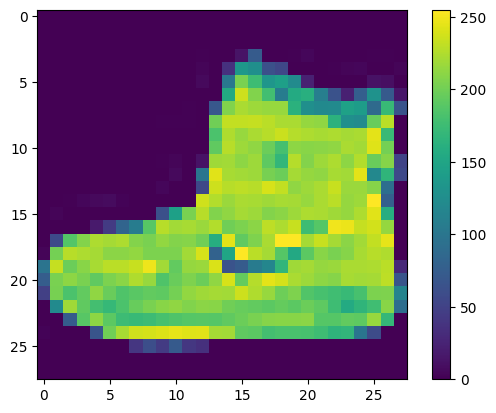

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* 값의 범위를 0~1 사이로 조정

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

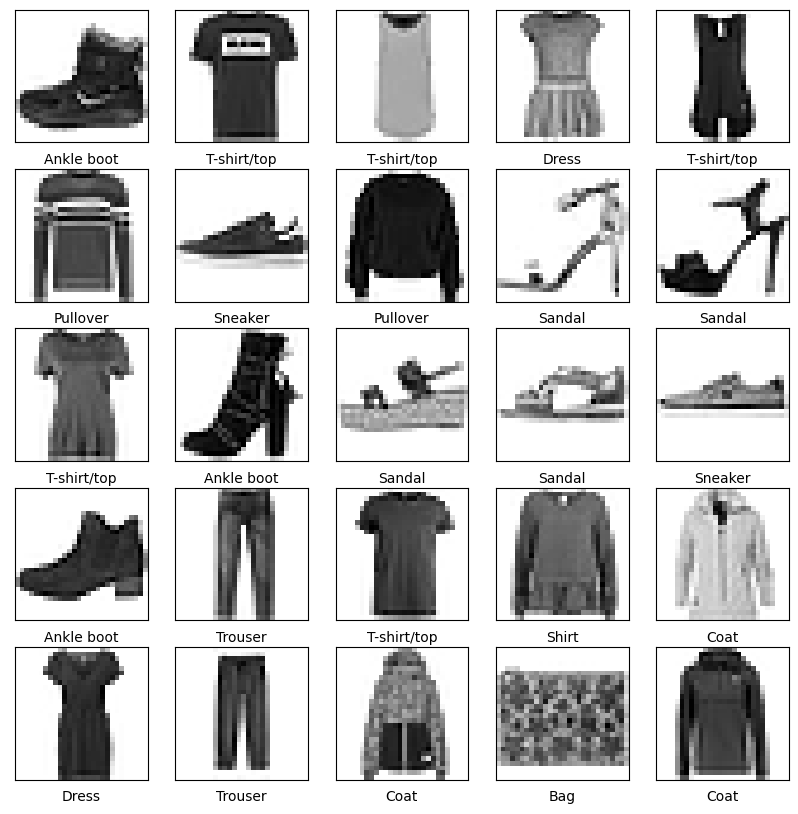

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

* 모멜 층 구성
* 컴파일

### 층 설정

* 레이어: 신경망의 기본 빌딩 블록
* tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

* 첫번째 층 tf.keras.layers.Flatten
  * 2차원 배열의 이미지 포맷을 1차원 배열로 변환
* 밀집 연결, 완전 연결: 픽셀을 펼친 후  연결된 두개의 tf.keras.layers.Dense층
  * 첫번째 dense: 128개의 노드
  * 두번째 softmax: 10개의 노드 , 10개의 확률 반환

## 모델 컴파일
* 손실함수: 모델이 얼마나 정확한지 측정
* 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수 기반으로 모델 업데이트
* 메트릭: 훈련, 테스트 단계 모니터링 (정확도)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 신경망 모델 훈련

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측 생성
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인


### 모델 피드

훈련을 시작하려면 `model.fit`메서드를 호출

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 41:02 - loss: 2.3756 - accuracy: 0.0312

  25/1875 [..............................] - ETA: 3s - loss: 1.4449 - accuracy: 0.5200   

  50/1875 [..............................] - ETA: 3s - loss: 1.1565 - accuracy: 0.6094

  75/1875 [>.............................] - ETA: 3s - loss: 1.0394 - accuracy: 0.6442

 101/1875 [>.............................] - ETA: 3s - loss: 0.9476 - accuracy: 0.6785

 126/1875 [=>............................] - ETA: 3s - loss: 0.9009 - accuracy: 0.6964

 151/1875 [=>............................] - ETA: 3s - loss: 0.8538 - accuracy: 0.7152

 177/1875 [=>............................] - ETA: 3s - loss: 0.8189 - accuracy: 0.7256

 203/1875 [==>...........................] - ETA: 3s - loss: 0.7837 - accuracy: 0.7381

 229/1875 [==>...........................] - ETA: 3s - loss: 0.7697 - accuracy: 0.7419

 255/1875 [===>..........................] - ETA: 3s - loss: 0.7498 - accuracy: 0.7482

 281/1875 [===>..........................] - ETA: 3s - loss: 0.7261 - accuracy: 0.7560

 307/1875 [===>..........................] - ETA: 3s - loss: 0.7109 - accuracy: 0.7609

 332/1875 [====>.........................] - ETA: 3s - loss: 0.7009 - accuracy: 0.7632

 357/1875 [====>.........................] - ETA: 3s - loss: 0.6891 - accuracy: 0.7674

 382/1875 [=====>........................] - ETA: 2s - loss: 0.6813 - accuracy: 0.7701

 407/1875 [=====>........................] - ETA: 2s - loss: 0.6718 - accuracy: 0.7724

 432/1875 [=====>........................] - ETA: 2s - loss: 0.6641 - accuracy: 0.7746

 457/1875 [======>.......................] - ETA: 2s - loss: 0.6562 - accuracy: 0.7771

 483/1875 [======>.......................] - ETA: 2s - loss: 0.6451 - accuracy: 0.7805

 508/1875 [=======>......................] - ETA: 2s - loss: 0.6399 - accuracy: 0.7827

 534/1875 [=======>......................] - ETA: 2s - loss: 0.6345 - accuracy: 0.7841

 559/1875 [=======>......................] - ETA: 2s - loss: 0.6291 - accuracy: 0.7858

 585/1875 [========>.....................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7872

 611/1875 [========>.....................] - ETA: 2s - loss: 0.6185 - accuracy: 0.7886

 637/1875 [=========>....................] - ETA: 2s - loss: 0.6150 - accuracy: 0.7893

 663/1875 [=========>....................] - ETA: 2s - loss: 0.6124 - accuracy: 0.7903

 689/1875 [==========>...................] - ETA: 2s - loss: 0.6069 - accuracy: 0.7917

 715/1875 [==========>...................] - ETA: 2s - loss: 0.5994 - accuracy: 0.7937

 741/1875 [==========>...................] - ETA: 2s - loss: 0.5943 - accuracy: 0.7954

 767/1875 [===========>..................] - ETA: 2s - loss: 0.5891 - accuracy: 0.7979

 793/1875 [===========>..................] - ETA: 2s - loss: 0.5845 - accuracy: 0.7992

 818/1875 [============>.................] - ETA: 2s - loss: 0.5813 - accuracy: 0.8002

 843/1875 [============>.................] - ETA: 2s - loss: 0.5770 - accuracy: 0.8020

 869/1875 [============>.................] - ETA: 2s - loss: 0.5723 - accuracy: 0.8032

 895/1875 [=============>................] - ETA: 1s - loss: 0.5705 - accuracy: 0.8037

 921/1875 [=============>................] - ETA: 1s - loss: 0.5690 - accuracy: 0.8044

 947/1875 [==============>...............] - ETA: 1s - loss: 0.5662 - accuracy: 0.8050

 972/1875 [==============>...............] - ETA: 1s - loss: 0.5625 - accuracy: 0.8060

 997/1875 [==============>...............] - ETA: 1s - loss: 0.5601 - accuracy: 0.8069

1022/1875 [===============>..............] - ETA: 1s - loss: 0.5593 - accuracy: 0.8071

1047/1875 [===============>..............] - ETA: 1s - loss: 0.5567 - accuracy: 0.8076

1073/1875 [================>.............] - ETA: 1s - loss: 0.5558 - accuracy: 0.8076

1099/1875 [================>.............] - ETA: 1s - loss: 0.5525 - accuracy: 0.8088

1125/1875 [=================>............] - ETA: 1s - loss: 0.5499 - accuracy: 0.8098

1151/1875 [=================>............] - ETA: 1s - loss: 0.5467 - accuracy: 0.8107

1177/1875 [=================>............] - ETA: 1s - loss: 0.5447 - accuracy: 0.8114

1203/1875 [==================>...........] - ETA: 1s - loss: 0.5422 - accuracy: 0.8124

1229/1875 [==================>...........] - ETA: 1s - loss: 0.5403 - accuracy: 0.8130

1256/1875 [===================>..........] - ETA: 1s - loss: 0.5378 - accuracy: 0.8139

1283/1875 [===================>..........] - ETA: 1s - loss: 0.5354 - accuracy: 0.8148

1309/1875 [===================>..........] - ETA: 1s - loss: 0.5328 - accuracy: 0.8156

1335/1875 [====================>.........] - ETA: 1s - loss: 0.5298 - accuracy: 0.8165

1361/1875 [====================>.........] - ETA: 1s - loss: 0.5278 - accuracy: 0.8175

1387/1875 [=====================>........] - ETA: 0s - loss: 0.5264 - accuracy: 0.8177

1413/1875 [=====================>........] - ETA: 0s - loss: 0.5247 - accuracy: 0.8183

1439/1875 [======================>.......] - ETA: 0s - loss: 0.5226 - accuracy: 0.8188

1466/1875 [======================>.......] - ETA: 0s - loss: 0.5210 - accuracy: 0.8196

1493/1875 [======================>.......] - ETA: 0s - loss: 0.5207 - accuracy: 0.8199

1518/1875 [=======================>......] - ETA: 0s - loss: 0.5188 - accuracy: 0.8204

1544/1875 [=======================>......] - ETA: 0s - loss: 0.5179 - accuracy: 0.8207

1570/1875 [========================>.....] - ETA: 0s - loss: 0.5167 - accuracy: 0.8210

1596/1875 [========================>.....] - ETA: 0s - loss: 0.5159 - accuracy: 0.8213

1622/1875 [========================>.....] - ETA: 0s - loss: 0.5132 - accuracy: 0.8220

1648/1875 [=========================>....] - ETA: 0s - loss: 0.5117 - accuracy: 0.8224

1674/1875 [=========================>....] - ETA: 0s - loss: 0.5100 - accuracy: 0.8230

1700/1875 [==========================>...] - ETA: 0s - loss: 0.5085 - accuracy: 0.8237

1726/1875 [==========================>...] - ETA: 0s - loss: 0.5072 - accuracy: 0.8239

1751/1875 [===========================>..] - ETA: 0s - loss: 0.5062 - accuracy: 0.8242

1776/1875 [===========================>..] - ETA: 0s - loss: 0.5057 - accuracy: 0.8242

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5046 - accuracy: 0.8244

1826/1875 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.8249

1852/1875 [============================>.] - ETA: 0s - loss: 0.5023 - accuracy: 0.8253

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5012 - accuracy: 0.8255


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4188 - accuracy: 0.8125

  27/1875 [..............................] - ETA: 3s - loss: 0.3946 - accuracy: 0.8438

  52/1875 [..............................] - ETA: 3s - loss: 0.3699 - accuracy: 0.8630

  77/1875 [>.............................] - ETA: 3s - loss: 0.3792 - accuracy: 0.8600

 103/1875 [>.............................] - ETA: 3s - loss: 0.3836 - accuracy: 0.8601

 128/1875 [=>............................] - ETA: 3s - loss: 0.3809 - accuracy: 0.8599

 153/1875 [=>............................] - ETA: 3s - loss: 0.3735 - accuracy: 0.8638

 178/1875 [=>............................] - ETA: 3s - loss: 0.3844 - accuracy: 0.8611

 203/1875 [==>...........................] - ETA: 3s - loss: 0.3827 - accuracy: 0.8608

 229/1875 [==>...........................] - ETA: 3s - loss: 0.3817 - accuracy: 0.8618

 255/1875 [===>..........................] - ETA: 3s - loss: 0.3809 - accuracy: 0.8609

 280/1875 [===>..........................] - ETA: 3s - loss: 0.3853 - accuracy: 0.8587

 304/1875 [===>..........................] - ETA: 3s - loss: 0.3887 - accuracy: 0.8579

 329/1875 [====>.........................] - ETA: 3s - loss: 0.3897 - accuracy: 0.8581

 355/1875 [====>.........................] - ETA: 3s - loss: 0.3882 - accuracy: 0.8588

 379/1875 [=====>........................] - ETA: 3s - loss: 0.3886 - accuracy: 0.8587

 403/1875 [=====>........................] - ETA: 2s - loss: 0.3886 - accuracy: 0.8583

 426/1875 [=====>........................] - ETA: 2s - loss: 0.3880 - accuracy: 0.8581

 450/1875 [======>.......................] - ETA: 2s - loss: 0.3863 - accuracy: 0.8586

 474/1875 [======>.......................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8590

 498/1875 [======>.......................] - ETA: 2s - loss: 0.3828 - accuracy: 0.8599

 523/1875 [=======>......................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8597

 546/1875 [=======>......................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8594

 569/1875 [========>.....................] - ETA: 2s - loss: 0.3863 - accuracy: 0.8587

 592/1875 [========>.....................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8596

 616/1875 [========>.....................] - ETA: 2s - loss: 0.3845 - accuracy: 0.8593

 640/1875 [=========>....................] - ETA: 2s - loss: 0.3828 - accuracy: 0.8597

 663/1875 [=========>....................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8595

 686/1875 [=========>....................] - ETA: 2s - loss: 0.3834 - accuracy: 0.8596

 709/1875 [==========>...................] - ETA: 2s - loss: 0.3826 - accuracy: 0.8601

 732/1875 [==========>...................] - ETA: 2s - loss: 0.3818 - accuracy: 0.8605

 755/1875 [===========>..................] - ETA: 2s - loss: 0.3815 - accuracy: 0.8603

 780/1875 [===========>..................] - ETA: 2s - loss: 0.3802 - accuracy: 0.8608

 806/1875 [===========>..................] - ETA: 2s - loss: 0.3809 - accuracy: 0.8605

 832/1875 [============>.................] - ETA: 2s - loss: 0.3811 - accuracy: 0.8604

 858/1875 [============>.................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8602

 884/1875 [=============>................] - ETA: 2s - loss: 0.3820 - accuracy: 0.8607

 910/1875 [=============>................] - ETA: 2s - loss: 0.3824 - accuracy: 0.8604

 936/1875 [=============>................] - ETA: 1s - loss: 0.3820 - accuracy: 0.8604

 961/1875 [==============>...............] - ETA: 1s - loss: 0.3814 - accuracy: 0.8604

 985/1875 [==============>...............] - ETA: 1s - loss: 0.3811 - accuracy: 0.8607

1010/1875 [===============>..............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8612

1035/1875 [===============>..............] - ETA: 1s - loss: 0.3797 - accuracy: 0.8613

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3806 - accuracy: 0.8614

1087/1875 [================>.............] - ETA: 1s - loss: 0.3804 - accuracy: 0.8613

1111/1875 [================>.............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8613

1135/1875 [=================>............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8617

1159/1875 [=================>............] - ETA: 1s - loss: 0.3800 - accuracy: 0.8617

1183/1875 [=================>............] - ETA: 1s - loss: 0.3797 - accuracy: 0.8618

1207/1875 [==================>...........] - ETA: 1s - loss: 0.3778 - accuracy: 0.8625

1230/1875 [==================>...........] - ETA: 1s - loss: 0.3771 - accuracy: 0.8629

1253/1875 [===================>..........] - ETA: 1s - loss: 0.3768 - accuracy: 0.8630

1277/1875 [===================>..........] - ETA: 1s - loss: 0.3773 - accuracy: 0.8630

1301/1875 [===================>..........] - ETA: 1s - loss: 0.3778 - accuracy: 0.8628

1326/1875 [====================>.........] - ETA: 1s - loss: 0.3776 - accuracy: 0.8630

1351/1875 [====================>.........] - ETA: 1s - loss: 0.3771 - accuracy: 0.8633

1375/1875 [=====================>........] - ETA: 1s - loss: 0.3762 - accuracy: 0.8637

1400/1875 [=====================>........] - ETA: 0s - loss: 0.3760 - accuracy: 0.8638

1426/1875 [=====================>........] - ETA: 0s - loss: 0.3750 - accuracy: 0.8641

1452/1875 [======================>.......] - ETA: 0s - loss: 0.3754 - accuracy: 0.8641

1478/1875 [======================>.......] - ETA: 0s - loss: 0.3747 - accuracy: 0.8643

1504/1875 [=======================>......] - ETA: 0s - loss: 0.3744 - accuracy: 0.8644

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3743 - accuracy: 0.8645

1556/1875 [=======================>......] - ETA: 0s - loss: 0.3755 - accuracy: 0.8641

1581/1875 [========================>.....] - ETA: 0s - loss: 0.3760 - accuracy: 0.8638

1607/1875 [========================>.....] - ETA: 0s - loss: 0.3759 - accuracy: 0.8639

1633/1875 [=========================>....] - ETA: 0s - loss: 0.3759 - accuracy: 0.8639

1659/1875 [=========================>....] - ETA: 0s - loss: 0.3757 - accuracy: 0.8642

1685/1875 [=========================>....] - ETA: 0s - loss: 0.3749 - accuracy: 0.8645

1712/1875 [==========================>...] - ETA: 0s - loss: 0.3743 - accuracy: 0.8646

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3740 - accuracy: 0.8646

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3729 - accuracy: 0.8649

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3728 - accuracy: 0.8649

1814/1875 [============================>.] - ETA: 0s - loss: 0.3721 - accuracy: 0.8652

1840/1875 [============================>.] - ETA: 0s - loss: 0.3725 - accuracy: 0.8650

1866/1875 [============================>.] - ETA: 0s - loss: 0.3721 - accuracy: 0.8653

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8652


Epoch 3/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4018 - accuracy: 0.8750

  27/1875 [..............................] - ETA: 3s - loss: 0.3469 - accuracy: 0.8773

  53/1875 [..............................] - ETA: 3s - loss: 0.3543 - accuracy: 0.8750

  79/1875 [>.............................] - ETA: 3s - loss: 0.3552 - accuracy: 0.8734

 105/1875 [>.............................] - ETA: 3s - loss: 0.3482 - accuracy: 0.8750

 131/1875 [=>............................] - ETA: 3s - loss: 0.3444 - accuracy: 0.8771

 158/1875 [=>............................] - ETA: 3s - loss: 0.3394 - accuracy: 0.8772

 185/1875 [=>............................] - ETA: 3s - loss: 0.3454 - accuracy: 0.8748

 211/1875 [==>...........................] - ETA: 3s - loss: 0.3411 - accuracy: 0.8749

 237/1875 [==>...........................] - ETA: 3s - loss: 0.3440 - accuracy: 0.8720

 264/1875 [===>..........................] - ETA: 3s - loss: 0.3457 - accuracy: 0.8717

 290/1875 [===>..........................] - ETA: 3s - loss: 0.3421 - accuracy: 0.8734

 316/1875 [====>.........................] - ETA: 3s - loss: 0.3438 - accuracy: 0.8733

 342/1875 [====>.........................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8757

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8762

 394/1875 [=====>........................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8748

 420/1875 [=====>........................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8749

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3355 - accuracy: 0.8754

 472/1875 [======>.......................] - ETA: 2s - loss: 0.3348 - accuracy: 0.8758

 498/1875 [======>.......................] - ETA: 2s - loss: 0.3360 - accuracy: 0.8750

 525/1875 [=======>......................] - ETA: 2s - loss: 0.3384 - accuracy: 0.8739

 551/1875 [=======>......................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8740

 577/1875 [========>.....................] - ETA: 2s - loss: 0.3358 - accuracy: 0.8749

 602/1875 [========>.....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8753

 628/1875 [=========>....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8750

 654/1875 [=========>....................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8753

 680/1875 [=========>....................] - ETA: 2s - loss: 0.3360 - accuracy: 0.8755

 706/1875 [==========>...................] - ETA: 2s - loss: 0.3371 - accuracy: 0.8751

 731/1875 [==========>...................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8753

 757/1875 [===========>..................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8755

 783/1875 [===========>..................] - ETA: 2s - loss: 0.3396 - accuracy: 0.8752

 809/1875 [===========>..................] - ETA: 2s - loss: 0.3391 - accuracy: 0.8750

 835/1875 [============>.................] - ETA: 2s - loss: 0.3373 - accuracy: 0.8756

 861/1875 [============>.................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8757

 887/1875 [=============>................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8759

 913/1875 [=============>................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8757

 940/1875 [==============>...............] - ETA: 1s - loss: 0.3363 - accuracy: 0.8759

 966/1875 [==============>...............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8760

 992/1875 [==============>...............] - ETA: 1s - loss: 0.3365 - accuracy: 0.8760

1018/1875 [===============>..............] - ETA: 1s - loss: 0.3359 - accuracy: 0.8759

1045/1875 [===============>..............] - ETA: 1s - loss: 0.3357 - accuracy: 0.8759

1071/1875 [================>.............] - ETA: 1s - loss: 0.3357 - accuracy: 0.8761

1097/1875 [================>.............] - ETA: 1s - loss: 0.3350 - accuracy: 0.8766

1123/1875 [================>.............] - ETA: 1s - loss: 0.3354 - accuracy: 0.8766

1149/1875 [=================>............] - ETA: 1s - loss: 0.3353 - accuracy: 0.8767

1175/1875 [=================>............] - ETA: 1s - loss: 0.3360 - accuracy: 0.8768

1201/1875 [==================>...........] - ETA: 1s - loss: 0.3359 - accuracy: 0.8771

1227/1875 [==================>...........] - ETA: 1s - loss: 0.3366 - accuracy: 0.8766

1253/1875 [===================>..........] - ETA: 1s - loss: 0.3363 - accuracy: 0.8765

1279/1875 [===================>..........] - ETA: 1s - loss: 0.3355 - accuracy: 0.8766

1305/1875 [===================>..........] - ETA: 1s - loss: 0.3366 - accuracy: 0.8760

1330/1875 [====================>.........] - ETA: 1s - loss: 0.3369 - accuracy: 0.8760

1355/1875 [====================>.........] - ETA: 1s - loss: 0.3368 - accuracy: 0.8760

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3370 - accuracy: 0.8761

1407/1875 [=====================>........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8760

1433/1875 [=====================>........] - ETA: 0s - loss: 0.3367 - accuracy: 0.8760

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3366 - accuracy: 0.8762

1485/1875 [======================>.......] - ETA: 0s - loss: 0.3356 - accuracy: 0.8764

1511/1875 [=======================>......] - ETA: 0s - loss: 0.3358 - accuracy: 0.8764

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3362 - accuracy: 0.8763

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3366 - accuracy: 0.8762

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3368 - accuracy: 0.8760

1613/1875 [========================>.....] - ETA: 0s - loss: 0.3365 - accuracy: 0.8762

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3367 - accuracy: 0.8761

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3368 - accuracy: 0.8762

1688/1875 [==========================>...] - ETA: 0s - loss: 0.3379 - accuracy: 0.8758

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.8759

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3371 - accuracy: 0.8764

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3363 - accuracy: 0.8766

1789/1875 [===========================>..] - ETA: 0s - loss: 0.3378 - accuracy: 0.8762

1815/1875 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8759

1841/1875 [============================>.] - ETA: 0s - loss: 0.3381 - accuracy: 0.8762

1867/1875 [============================>.] - ETA: 0s - loss: 0.3384 - accuracy: 0.8761

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8760


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.4696 - accuracy: 0.8438

  26/1875 [..............................] - ETA: 3s - loss: 0.3158 - accuracy: 0.8786

  51/1875 [..............................] - ETA: 3s - loss: 0.3263 - accuracy: 0.8781

  77/1875 [>.............................] - ETA: 3s - loss: 0.3251 - accuracy: 0.8758

 102/1875 [>.............................] - ETA: 3s - loss: 0.3295 - accuracy: 0.8762

 127/1875 [=>............................] - ETA: 3s - loss: 0.3262 - accuracy: 0.8772

 152/1875 [=>............................] - ETA: 3s - loss: 0.3241 - accuracy: 0.8766

 178/1875 [=>............................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8776

 202/1875 [==>...........................] - ETA: 3s - loss: 0.3196 - accuracy: 0.8792

 226/1875 [==>...........................] - ETA: 3s - loss: 0.3224 - accuracy: 0.8793

 251/1875 [===>..........................] - ETA: 3s - loss: 0.3230 - accuracy: 0.8790

 276/1875 [===>..........................] - ETA: 3s - loss: 0.3224 - accuracy: 0.8790

 301/1875 [===>..........................] - ETA: 3s - loss: 0.3218 - accuracy: 0.8790

 326/1875 [====>.........................] - ETA: 3s - loss: 0.3208 - accuracy: 0.8808

 351/1875 [====>.........................] - ETA: 3s - loss: 0.3230 - accuracy: 0.8794

 376/1875 [=====>........................] - ETA: 3s - loss: 0.3202 - accuracy: 0.8806

 401/1875 [=====>........................] - ETA: 3s - loss: 0.3203 - accuracy: 0.8809

 427/1875 [=====>........................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8809

 452/1875 [======>.......................] - ETA: 2s - loss: 0.3191 - accuracy: 0.8810

 477/1875 [======>.......................] - ETA: 2s - loss: 0.3208 - accuracy: 0.8804

 502/1875 [=======>......................] - ETA: 2s - loss: 0.3219 - accuracy: 0.8801

 527/1875 [=======>......................] - ETA: 2s - loss: 0.3203 - accuracy: 0.8808

 551/1875 [=======>......................] - ETA: 2s - loss: 0.3203 - accuracy: 0.8807

 575/1875 [========>.....................] - ETA: 2s - loss: 0.3202 - accuracy: 0.8809

 599/1875 [========>.....................] - ETA: 2s - loss: 0.3208 - accuracy: 0.8808

 624/1875 [========>.....................] - ETA: 2s - loss: 0.3215 - accuracy: 0.8802

 648/1875 [=========>....................] - ETA: 2s - loss: 0.3214 - accuracy: 0.8804

 672/1875 [=========>....................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8813

 696/1875 [==========>...................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8815

 719/1875 [==========>...................] - ETA: 2s - loss: 0.3185 - accuracy: 0.8814

 744/1875 [==========>...................] - ETA: 2s - loss: 0.3178 - accuracy: 0.8819

 768/1875 [===========>..................] - ETA: 2s - loss: 0.3187 - accuracy: 0.8821

 792/1875 [===========>..................] - ETA: 2s - loss: 0.3171 - accuracy: 0.8828

 816/1875 [============>.................] - ETA: 2s - loss: 0.3191 - accuracy: 0.8821

 840/1875 [============>.................] - ETA: 2s - loss: 0.3197 - accuracy: 0.8817

 864/1875 [============>.................] - ETA: 2s - loss: 0.3196 - accuracy: 0.8818

 889/1875 [=============>................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8818

 914/1875 [=============>................] - ETA: 1s - loss: 0.3194 - accuracy: 0.8819

 939/1875 [==============>...............] - ETA: 1s - loss: 0.3183 - accuracy: 0.8826

 963/1875 [==============>...............] - ETA: 1s - loss: 0.3183 - accuracy: 0.8828

 987/1875 [==============>...............] - ETA: 1s - loss: 0.3178 - accuracy: 0.8831

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3166 - accuracy: 0.8833

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3171 - accuracy: 0.8831

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3167 - accuracy: 0.8831

1085/1875 [================>.............] - ETA: 1s - loss: 0.3176 - accuracy: 0.8832

1109/1875 [================>.............] - ETA: 1s - loss: 0.3175 - accuracy: 0.8833

1133/1875 [=================>............] - ETA: 1s - loss: 0.3172 - accuracy: 0.8832

1158/1875 [=================>............] - ETA: 1s - loss: 0.3169 - accuracy: 0.8832

1183/1875 [=================>............] - ETA: 1s - loss: 0.3171 - accuracy: 0.8833

1207/1875 [==================>...........] - ETA: 1s - loss: 0.3171 - accuracy: 0.8832

1232/1875 [==================>...........] - ETA: 1s - loss: 0.3173 - accuracy: 0.8831

1256/1875 [===================>..........] - ETA: 1s - loss: 0.3172 - accuracy: 0.8833

1281/1875 [===================>..........] - ETA: 1s - loss: 0.3175 - accuracy: 0.8831

1307/1875 [===================>..........] - ETA: 1s - loss: 0.3177 - accuracy: 0.8831

1331/1875 [====================>.........] - ETA: 1s - loss: 0.3177 - accuracy: 0.8829

1356/1875 [====================>.........] - ETA: 1s - loss: 0.3172 - accuracy: 0.8831

1380/1875 [=====================>........] - ETA: 1s - loss: 0.3169 - accuracy: 0.8833

1405/1875 [=====================>........] - ETA: 0s - loss: 0.3163 - accuracy: 0.8836

1431/1875 [=====================>........] - ETA: 0s - loss: 0.3153 - accuracy: 0.8842

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3148 - accuracy: 0.8844

1481/1875 [======================>.......] - ETA: 0s - loss: 0.3150 - accuracy: 0.8842

1506/1875 [=======================>......] - ETA: 0s - loss: 0.3149 - accuracy: 0.8841

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3145 - accuracy: 0.8840

1555/1875 [=======================>......] - ETA: 0s - loss: 0.3142 - accuracy: 0.8841

1579/1875 [========================>.....] - ETA: 0s - loss: 0.3144 - accuracy: 0.8839

1603/1875 [========================>.....] - ETA: 0s - loss: 0.3146 - accuracy: 0.8838

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8838

1651/1875 [=========================>....] - ETA: 0s - loss: 0.3146 - accuracy: 0.8836

1675/1875 [=========================>....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8836

1699/1875 [==========================>...] - ETA: 0s - loss: 0.3139 - accuracy: 0.8838

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3135 - accuracy: 0.8839

1747/1875 [==========================>...] - ETA: 0s - loss: 0.3135 - accuracy: 0.8841

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3139 - accuracy: 0.8840

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3142 - accuracy: 0.8841

1823/1875 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8842

1849/1875 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8841

1875/1875 [==============================] - ETA: 0s - loss: 0.3143 - accuracy: 0.8841

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8841


Epoch 5/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2508 - accuracy: 0.8750

  26/1875 [..............................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8966

  50/1875 [..............................] - ETA: 3s - loss: 0.2700 - accuracy: 0.9050

  76/1875 [>.............................] - ETA: 3s - loss: 0.2716 - accuracy: 0.9025

 102/1875 [>.............................] - ETA: 3s - loss: 0.2776 - accuracy: 0.9013

 127/1875 [=>............................] - ETA: 3s - loss: 0.2743 - accuracy: 0.9001

 152/1875 [=>............................] - ETA: 3s - loss: 0.2804 - accuracy: 0.8960

 177/1875 [=>............................] - ETA: 3s - loss: 0.2901 - accuracy: 0.8932

 201/1875 [==>...........................] - ETA: 3s - loss: 0.2850 - accuracy: 0.8951

 224/1875 [==>...........................] - ETA: 3s - loss: 0.2846 - accuracy: 0.8958

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2872 - accuracy: 0.8960

 272/1875 [===>..........................] - ETA: 3s - loss: 0.2876 - accuracy: 0.8964

 296/1875 [===>..........................] - ETA: 3s - loss: 0.2848 - accuracy: 0.8974

 320/1875 [====>.........................] - ETA: 3s - loss: 0.2899 - accuracy: 0.8945

 343/1875 [====>.........................] - ETA: 3s - loss: 0.2922 - accuracy: 0.8941

 367/1875 [====>.........................] - ETA: 3s - loss: 0.2937 - accuracy: 0.8931

 390/1875 [=====>........................] - ETA: 3s - loss: 0.2958 - accuracy: 0.8919

 414/1875 [=====>........................] - ETA: 3s - loss: 0.2972 - accuracy: 0.8908

 438/1875 [======>.......................] - ETA: 3s - loss: 0.2985 - accuracy: 0.8904

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2997 - accuracy: 0.8902

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2999 - accuracy: 0.8901

 508/1875 [=======>......................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8907

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2999 - accuracy: 0.8907

 556/1875 [=======>......................] - ETA: 2s - loss: 0.2966 - accuracy: 0.8915

 580/1875 [========>.....................] - ETA: 2s - loss: 0.2975 - accuracy: 0.8908

 604/1875 [========>.....................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8911

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2954 - accuracy: 0.8915

 652/1875 [=========>....................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8915

 676/1875 [=========>....................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8921

 700/1875 [==========>...................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8916

 724/1875 [==========>...................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8918

 749/1875 [==========>...................] - ETA: 2s - loss: 0.2947 - accuracy: 0.8920

 773/1875 [===========>..................] - ETA: 2s - loss: 0.2955 - accuracy: 0.8914

 796/1875 [===========>..................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8914

 820/1875 [============>.................] - ETA: 2s - loss: 0.2948 - accuracy: 0.8916

 844/1875 [============>.................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8915

 867/1875 [============>.................] - ETA: 2s - loss: 0.2955 - accuracy: 0.8917

 890/1875 [=============>................] - ETA: 2s - loss: 0.2944 - accuracy: 0.8919

 913/1875 [=============>................] - ETA: 2s - loss: 0.2945 - accuracy: 0.8921

 936/1875 [=============>................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8919

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2952 - accuracy: 0.8918

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2940 - accuracy: 0.8923

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8917

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2954 - accuracy: 0.8913

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8915

1077/1875 [================>.............] - ETA: 1s - loss: 0.2950 - accuracy: 0.8915

1101/1875 [================>.............] - ETA: 1s - loss: 0.2942 - accuracy: 0.8918

1125/1875 [=================>............] - ETA: 1s - loss: 0.2939 - accuracy: 0.8920

1148/1875 [=================>............] - ETA: 1s - loss: 0.2935 - accuracy: 0.8920

1171/1875 [=================>............] - ETA: 1s - loss: 0.2935 - accuracy: 0.8919

1195/1875 [==================>...........] - ETA: 1s - loss: 0.2931 - accuracy: 0.8918

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2941 - accuracy: 0.8915

1242/1875 [==================>...........] - ETA: 1s - loss: 0.2945 - accuracy: 0.8912

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2945 - accuracy: 0.8911

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2947 - accuracy: 0.8908

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2956 - accuracy: 0.8908

1336/1875 [====================>.........] - ETA: 1s - loss: 0.2960 - accuracy: 0.8906

1359/1875 [====================>.........] - ETA: 1s - loss: 0.2959 - accuracy: 0.8905

1383/1875 [=====================>........] - ETA: 1s - loss: 0.2962 - accuracy: 0.8906

1407/1875 [=====================>........] - ETA: 1s - loss: 0.2970 - accuracy: 0.8906

1430/1875 [=====================>........] - ETA: 0s - loss: 0.2963 - accuracy: 0.8908

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2952 - accuracy: 0.8912

1477/1875 [======================>.......] - ETA: 0s - loss: 0.2949 - accuracy: 0.8914

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2948 - accuracy: 0.8915

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2951 - accuracy: 0.8912

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2948 - accuracy: 0.8913

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2944 - accuracy: 0.8914

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2946 - accuracy: 0.8913

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2940 - accuracy: 0.8914

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2941 - accuracy: 0.8913

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2940 - accuracy: 0.8914

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2937 - accuracy: 0.8916

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2939 - accuracy: 0.8914

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2942 - accuracy: 0.8913

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2950 - accuracy: 0.8910

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2949 - accuracy: 0.8909

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2952 - accuracy: 0.8910

1829/1875 [============================>.] - ETA: 0s - loss: 0.2956 - accuracy: 0.8908

1853/1875 [============================>.] - ETA: 0s - loss: 0.2952 - accuracy: 0.8910

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8912


Epoch 6/10


   1/1875 [..............................] - ETA: 5s - loss: 0.0796 - accuracy: 1.0000

  26/1875 [..............................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9135

  51/1875 [..............................] - ETA: 3s - loss: 0.2578 - accuracy: 0.9099

  75/1875 [>.............................] - ETA: 3s - loss: 0.2693 - accuracy: 0.9025

  99/1875 [>.............................] - ETA: 3s - loss: 0.2714 - accuracy: 0.9009

 123/1875 [>.............................] - ETA: 3s - loss: 0.2754 - accuracy: 0.8996

 147/1875 [=>............................] - ETA: 3s - loss: 0.2733 - accuracy: 0.8999

 172/1875 [=>............................] - ETA: 3s - loss: 0.2756 - accuracy: 0.8972

 196/1875 [==>...........................] - ETA: 3s - loss: 0.2799 - accuracy: 0.8967

 220/1875 [==>...........................] - ETA: 3s - loss: 0.2771 - accuracy: 0.8980

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2768 - accuracy: 0.8979

 266/1875 [===>..........................] - ETA: 3s - loss: 0.2747 - accuracy: 0.8990

 290/1875 [===>..........................] - ETA: 3s - loss: 0.2746 - accuracy: 0.8990

 314/1875 [====>.........................] - ETA: 3s - loss: 0.2776 - accuracy: 0.8975

 338/1875 [====>.........................] - ETA: 3s - loss: 0.2813 - accuracy: 0.8958

 362/1875 [====>.........................] - ETA: 3s - loss: 0.2842 - accuracy: 0.8949

 386/1875 [=====>........................] - ETA: 3s - loss: 0.2856 - accuracy: 0.8945

 411/1875 [=====>........................] - ETA: 3s - loss: 0.2832 - accuracy: 0.8956

 435/1875 [=====>........................] - ETA: 3s - loss: 0.2815 - accuracy: 0.8960

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2804 - accuracy: 0.8960

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2824 - accuracy: 0.8955

 507/1875 [=======>......................] - ETA: 2s - loss: 0.2806 - accuracy: 0.8960

 531/1875 [=======>......................] - ETA: 2s - loss: 0.2803 - accuracy: 0.8955

 554/1875 [=======>......................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8950

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2797 - accuracy: 0.8953

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2800 - accuracy: 0.8957

 627/1875 [=========>....................] - ETA: 2s - loss: 0.2827 - accuracy: 0.8949

 651/1875 [=========>....................] - ETA: 2s - loss: 0.2821 - accuracy: 0.8953

 675/1875 [=========>....................] - ETA: 2s - loss: 0.2820 - accuracy: 0.8953

 700/1875 [==========>...................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8956

 725/1875 [==========>...................] - ETA: 2s - loss: 0.2827 - accuracy: 0.8953

 749/1875 [==========>...................] - ETA: 2s - loss: 0.2833 - accuracy: 0.8954

 773/1875 [===========>..................] - ETA: 2s - loss: 0.2834 - accuracy: 0.8956

 797/1875 [===========>..................] - ETA: 2s - loss: 0.2831 - accuracy: 0.8959

 822/1875 [============>.................] - ETA: 2s - loss: 0.2823 - accuracy: 0.8963

 847/1875 [============>.................] - ETA: 2s - loss: 0.2826 - accuracy: 0.8964

 871/1875 [============>.................] - ETA: 2s - loss: 0.2824 - accuracy: 0.8965

 897/1875 [=============>................] - ETA: 2s - loss: 0.2821 - accuracy: 0.8967

 922/1875 [=============>................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8968

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2807 - accuracy: 0.8973

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2819 - accuracy: 0.8970

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2827 - accuracy: 0.8968

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2829 - accuracy: 0.8967

1045/1875 [===============>..............] - ETA: 1s - loss: 0.2823 - accuracy: 0.8970

1070/1875 [================>.............] - ETA: 1s - loss: 0.2823 - accuracy: 0.8968

1094/1875 [================>.............] - ETA: 1s - loss: 0.2827 - accuracy: 0.8969

1119/1875 [================>.............] - ETA: 1s - loss: 0.2825 - accuracy: 0.8968

1144/1875 [=================>............] - ETA: 1s - loss: 0.2825 - accuracy: 0.8969

1168/1875 [=================>............] - ETA: 1s - loss: 0.2836 - accuracy: 0.8964

1192/1875 [==================>...........] - ETA: 1s - loss: 0.2826 - accuracy: 0.8967

1216/1875 [==================>...........] - ETA: 1s - loss: 0.2827 - accuracy: 0.8967

1240/1875 [==================>...........] - ETA: 1s - loss: 0.2822 - accuracy: 0.8968

1264/1875 [===================>..........] - ETA: 1s - loss: 0.2819 - accuracy: 0.8969

1288/1875 [===================>..........] - ETA: 1s - loss: 0.2811 - accuracy: 0.8970

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2814 - accuracy: 0.8968

1336/1875 [====================>.........] - ETA: 1s - loss: 0.2811 - accuracy: 0.8969

1360/1875 [====================>.........] - ETA: 1s - loss: 0.2819 - accuracy: 0.8964

1383/1875 [=====================>........] - ETA: 1s - loss: 0.2820 - accuracy: 0.8964

1407/1875 [=====================>........] - ETA: 0s - loss: 0.2819 - accuracy: 0.8963

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2815 - accuracy: 0.8966

1455/1875 [======================>.......] - ETA: 0s - loss: 0.2818 - accuracy: 0.8963

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2825 - accuracy: 0.8961

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2822 - accuracy: 0.8962

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2819 - accuracy: 0.8965

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2819 - accuracy: 0.8963

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2821 - accuracy: 0.8963

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2822 - accuracy: 0.8964

1623/1875 [========================>.....] - ETA: 0s - loss: 0.2823 - accuracy: 0.8966

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8968

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8967

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2818 - accuracy: 0.8967

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2820 - accuracy: 0.8967

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2818 - accuracy: 0.8968

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2815 - accuracy: 0.8968

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2811 - accuracy: 0.8968

1815/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8969

1839/1875 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.8968

1863/1875 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8970

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8969


Epoch 7/10


   1/1875 [..............................] - ETA: 6s - loss: 0.4486 - accuracy: 0.8438

  25/1875 [..............................] - ETA: 4s - loss: 0.3026 - accuracy: 0.8913

  49/1875 [..............................] - ETA: 3s - loss: 0.2895 - accuracy: 0.8948

  73/1875 [>.............................] - ETA: 3s - loss: 0.2776 - accuracy: 0.8981

  97/1875 [>.............................] - ETA: 3s - loss: 0.2806 - accuracy: 0.8963

 121/1875 [>.............................] - ETA: 3s - loss: 0.2750 - accuracy: 0.8982

 145/1875 [=>............................] - ETA: 3s - loss: 0.2705 - accuracy: 0.9017

 169/1875 [=>............................] - ETA: 3s - loss: 0.2669 - accuracy: 0.9029

 193/1875 [==>...........................] - ETA: 3s - loss: 0.2640 - accuracy: 0.9043

 218/1875 [==>...........................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9035

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2637 - accuracy: 0.9047

 268/1875 [===>..........................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9033

 292/1875 [===>..........................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9029

 316/1875 [====>.........................] - ETA: 3s - loss: 0.2642 - accuracy: 0.9033

 339/1875 [====>.........................] - ETA: 3s - loss: 0.2647 - accuracy: 0.9034

 362/1875 [====>.........................] - ETA: 3s - loss: 0.2658 - accuracy: 0.9030

 386/1875 [=====>........................] - ETA: 3s - loss: 0.2647 - accuracy: 0.9031

 410/1875 [=====>........................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9028

 435/1875 [=====>........................] - ETA: 3s - loss: 0.2646 - accuracy: 0.9034

 460/1875 [======>.......................] - ETA: 3s - loss: 0.2643 - accuracy: 0.9035

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2631 - accuracy: 0.9037

 510/1875 [=======>......................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9033

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9033

 558/1875 [=======>......................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9033

 583/1875 [========>.....................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9030

 609/1875 [========>.....................] - ETA: 2s - loss: 0.2649 - accuracy: 0.9029

 635/1875 [=========>....................] - ETA: 2s - loss: 0.2642 - accuracy: 0.9031

 659/1875 [=========>....................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9024

 685/1875 [=========>....................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9020

 711/1875 [==========>...................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9022

 735/1875 [==========>...................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9026

 759/1875 [===========>..................] - ETA: 2s - loss: 0.2661 - accuracy: 0.9023

 784/1875 [===========>..................] - ETA: 2s - loss: 0.2656 - accuracy: 0.9026

 809/1875 [===========>..................] - ETA: 2s - loss: 0.2655 - accuracy: 0.9025

 834/1875 [============>.................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9022

 859/1875 [============>.................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9023

 883/1875 [=============>................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9018

 907/1875 [=============>................] - ETA: 2s - loss: 0.2674 - accuracy: 0.9016

 931/1875 [=============>................] - ETA: 1s - loss: 0.2660 - accuracy: 0.9021

 955/1875 [==============>...............] - ETA: 1s - loss: 0.2660 - accuracy: 0.9021

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2659 - accuracy: 0.9022

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2654 - accuracy: 0.9022

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2643 - accuracy: 0.9026

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2655 - accuracy: 0.9023

1077/1875 [================>.............] - ETA: 1s - loss: 0.2664 - accuracy: 0.9018

1102/1875 [================>.............] - ETA: 1s - loss: 0.2667 - accuracy: 0.9017

1126/1875 [=================>............] - ETA: 1s - loss: 0.2665 - accuracy: 0.9018

1150/1875 [=================>............] - ETA: 1s - loss: 0.2658 - accuracy: 0.9021

1175/1875 [=================>............] - ETA: 1s - loss: 0.2656 - accuracy: 0.9023

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2654 - accuracy: 0.9024

1225/1875 [==================>...........] - ETA: 1s - loss: 0.2654 - accuracy: 0.9026

1250/1875 [===================>..........] - ETA: 1s - loss: 0.2659 - accuracy: 0.9025

1275/1875 [===================>..........] - ETA: 1s - loss: 0.2659 - accuracy: 0.9025

1301/1875 [===================>..........] - ETA: 1s - loss: 0.2665 - accuracy: 0.9024

1327/1875 [====================>.........] - ETA: 1s - loss: 0.2665 - accuracy: 0.9022

1353/1875 [====================>.........] - ETA: 1s - loss: 0.2669 - accuracy: 0.9019

1378/1875 [=====================>........] - ETA: 1s - loss: 0.2669 - accuracy: 0.9018

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2672 - accuracy: 0.9017

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2670 - accuracy: 0.9017

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9017

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9014

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2670 - accuracy: 0.9013

1528/1875 [=======================>......] - ETA: 0s - loss: 0.2668 - accuracy: 0.9014

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2681 - accuracy: 0.9010

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2681 - accuracy: 0.9010

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2682 - accuracy: 0.9008

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2680 - accuracy: 0.9008

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2685 - accuracy: 0.9006

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2688 - accuracy: 0.9006

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.9008

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2689 - accuracy: 0.9006

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2693 - accuracy: 0.9004

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2696 - accuracy: 0.9003

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2698 - accuracy: 0.9002

1832/1875 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.9002

1857/1875 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.9003

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.9002


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2858 - accuracy: 0.9375

  27/1875 [..............................] - ETA: 3s - loss: 0.2357 - accuracy: 0.9213

  52/1875 [..............................] - ETA: 3s - loss: 0.2393 - accuracy: 0.9183

  77/1875 [>.............................] - ETA: 3s - loss: 0.2429 - accuracy: 0.9164

 101/1875 [>.............................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9177

 126/1875 [=>............................] - ETA: 3s - loss: 0.2457 - accuracy: 0.9129

 151/1875 [=>............................] - ETA: 3s - loss: 0.2480 - accuracy: 0.9127

 177/1875 [=>............................] - ETA: 3s - loss: 0.2490 - accuracy: 0.9128

 202/1875 [==>...........................] - ETA: 3s - loss: 0.2508 - accuracy: 0.9103

 228/1875 [==>...........................] - ETA: 3s - loss: 0.2479 - accuracy: 0.9110

 253/1875 [===>..........................] - ETA: 3s - loss: 0.2455 - accuracy: 0.9109

 279/1875 [===>..........................] - ETA: 3s - loss: 0.2488 - accuracy: 0.9091

 304/1875 [===>..........................] - ETA: 3s - loss: 0.2484 - accuracy: 0.9093

 329/1875 [====>.........................] - ETA: 3s - loss: 0.2472 - accuracy: 0.9098

 354/1875 [====>.........................] - ETA: 3s - loss: 0.2471 - accuracy: 0.9100

 379/1875 [=====>........................] - ETA: 3s - loss: 0.2466 - accuracy: 0.9109

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2445 - accuracy: 0.9115

 430/1875 [=====>........................] - ETA: 2s - loss: 0.2454 - accuracy: 0.9111

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2457 - accuracy: 0.9104

 481/1875 [======>.......................] - ETA: 2s - loss: 0.2497 - accuracy: 0.9090

 507/1875 [=======>......................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9090

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9097

 557/1875 [=======>......................] - ETA: 2s - loss: 0.2492 - accuracy: 0.9097

 582/1875 [========>.....................] - ETA: 2s - loss: 0.2495 - accuracy: 0.9095

 607/1875 [========>.....................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9095

 632/1875 [=========>....................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9091

 657/1875 [=========>....................] - ETA: 2s - loss: 0.2519 - accuracy: 0.9088

 683/1875 [=========>....................] - ETA: 2s - loss: 0.2508 - accuracy: 0.9092

 708/1875 [==========>...................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9089

 733/1875 [==========>...................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9090

 758/1875 [===========>..................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9093

 783/1875 [===========>..................] - ETA: 2s - loss: 0.2520 - accuracy: 0.9088

 808/1875 [===========>..................] - ETA: 2s - loss: 0.2521 - accuracy: 0.9087

 833/1875 [============>.................] - ETA: 2s - loss: 0.2532 - accuracy: 0.9082

 857/1875 [============>.................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9082

 882/1875 [=============>................] - ETA: 2s - loss: 0.2541 - accuracy: 0.9078

 907/1875 [=============>................] - ETA: 1s - loss: 0.2546 - accuracy: 0.9072

 932/1875 [=============>................] - ETA: 1s - loss: 0.2546 - accuracy: 0.9072

 958/1875 [==============>...............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9069

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2534 - accuracy: 0.9070

1008/1875 [===============>..............] - ETA: 1s - loss: 0.2528 - accuracy: 0.9071

1034/1875 [===============>..............] - ETA: 1s - loss: 0.2542 - accuracy: 0.9066

1060/1875 [===============>..............] - ETA: 1s - loss: 0.2529 - accuracy: 0.9071

1085/1875 [================>.............] - ETA: 1s - loss: 0.2527 - accuracy: 0.9072

1110/1875 [================>.............] - ETA: 1s - loss: 0.2527 - accuracy: 0.9071

1136/1875 [=================>............] - ETA: 1s - loss: 0.2522 - accuracy: 0.9073

1161/1875 [=================>............] - ETA: 1s - loss: 0.2523 - accuracy: 0.9075

1187/1875 [=================>............] - ETA: 1s - loss: 0.2529 - accuracy: 0.9074

1213/1875 [==================>...........] - ETA: 1s - loss: 0.2533 - accuracy: 0.9071

1239/1875 [==================>...........] - ETA: 1s - loss: 0.2528 - accuracy: 0.9072

1265/1875 [===================>..........] - ETA: 1s - loss: 0.2535 - accuracy: 0.9071

1290/1875 [===================>..........] - ETA: 1s - loss: 0.2542 - accuracy: 0.9066

1316/1875 [====================>.........] - ETA: 1s - loss: 0.2544 - accuracy: 0.9066

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2549 - accuracy: 0.9061

1368/1875 [====================>.........] - ETA: 1s - loss: 0.2552 - accuracy: 0.9059

1394/1875 [=====================>........] - ETA: 0s - loss: 0.2553 - accuracy: 0.9059

1420/1875 [=====================>........] - ETA: 0s - loss: 0.2549 - accuracy: 0.9059

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2545 - accuracy: 0.9061

1472/1875 [======================>.......] - ETA: 0s - loss: 0.2543 - accuracy: 0.9062

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2550 - accuracy: 0.9057

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2551 - accuracy: 0.9057

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2553 - accuracy: 0.9056

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2551 - accuracy: 0.9056

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2550 - accuracy: 0.9056

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9054

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9052

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9050

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2563 - accuracy: 0.9051

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9050

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2562 - accuracy: 0.9050

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2559 - accuracy: 0.9049

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2565 - accuracy: 0.9045

1831/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9044

1857/1875 [============================>.] - ETA: 0s - loss: 0.2570 - accuracy: 0.9043

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9042


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1942 - accuracy: 0.9062

  27/1875 [..............................] - ETA: 3s - loss: 0.2140 - accuracy: 0.9201

  52/1875 [..............................] - ETA: 3s - loss: 0.2301 - accuracy: 0.9099

  78/1875 [>.............................] - ETA: 3s - loss: 0.2278 - accuracy: 0.9127

 103/1875 [>.............................] - ETA: 3s - loss: 0.2303 - accuracy: 0.9123

 129/1875 [=>............................] - ETA: 3s - loss: 0.2311 - accuracy: 0.9125

 155/1875 [=>............................] - ETA: 3s - loss: 0.2290 - accuracy: 0.9137

 181/1875 [=>............................] - ETA: 3s - loss: 0.2346 - accuracy: 0.9140

 207/1875 [==>...........................] - ETA: 3s - loss: 0.2378 - accuracy: 0.9124

 232/1875 [==>...........................] - ETA: 3s - loss: 0.2409 - accuracy: 0.9106

 257/1875 [===>..........................] - ETA: 3s - loss: 0.2370 - accuracy: 0.9105

 283/1875 [===>..........................] - ETA: 3s - loss: 0.2389 - accuracy: 0.9089

 309/1875 [===>..........................] - ETA: 3s - loss: 0.2410 - accuracy: 0.9081

 335/1875 [====>.........................] - ETA: 3s - loss: 0.2400 - accuracy: 0.9083

 360/1875 [====>.........................] - ETA: 3s - loss: 0.2380 - accuracy: 0.9090

 385/1875 [=====>........................] - ETA: 2s - loss: 0.2386 - accuracy: 0.9096

 411/1875 [=====>........................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9092

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9103

 462/1875 [======>.......................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9087

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9077

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9072

 537/1875 [=======>......................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9070

 562/1875 [=======>......................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9070

 588/1875 [========>.....................] - ETA: 2s - loss: 0.2441 - accuracy: 0.9068

 614/1875 [========>.....................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9073

 640/1875 [=========>....................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9074

 666/1875 [=========>....................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9073

 692/1875 [==========>...................] - ETA: 2s - loss: 0.2445 - accuracy: 0.9073

 718/1875 [==========>...................] - ETA: 2s - loss: 0.2437 - accuracy: 0.9076

 744/1875 [==========>...................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9076

 770/1875 [===========>..................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9081

 795/1875 [===========>..................] - ETA: 2s - loss: 0.2406 - accuracy: 0.9086

 820/1875 [============>.................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9086

 845/1875 [============>.................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9082

 870/1875 [============>.................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9082

 895/1875 [=============>................] - ETA: 1s - loss: 0.2414 - accuracy: 0.9081

 920/1875 [=============>................] - ETA: 1s - loss: 0.2422 - accuracy: 0.9081

 945/1875 [==============>...............] - ETA: 1s - loss: 0.2423 - accuracy: 0.9080

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2423 - accuracy: 0.9082

 995/1875 [==============>...............] - ETA: 1s - loss: 0.2431 - accuracy: 0.9082

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2430 - accuracy: 0.9085

1044/1875 [===============>..............] - ETA: 1s - loss: 0.2437 - accuracy: 0.9080

1069/1875 [================>.............] - ETA: 1s - loss: 0.2435 - accuracy: 0.9082

1094/1875 [================>.............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9083

1119/1875 [================>.............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9084

1144/1875 [=================>............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9084

1168/1875 [=================>............] - ETA: 1s - loss: 0.2435 - accuracy: 0.9083

1193/1875 [==================>...........] - ETA: 1s - loss: 0.2437 - accuracy: 0.9084

1217/1875 [==================>...........] - ETA: 1s - loss: 0.2435 - accuracy: 0.9086

1242/1875 [==================>...........] - ETA: 1s - loss: 0.2441 - accuracy: 0.9083

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2443 - accuracy: 0.9083

1290/1875 [===================>..........] - ETA: 1s - loss: 0.2455 - accuracy: 0.9079

1315/1875 [====================>.........] - ETA: 1s - loss: 0.2459 - accuracy: 0.9077

1340/1875 [====================>.........] - ETA: 1s - loss: 0.2456 - accuracy: 0.9079

1365/1875 [====================>.........] - ETA: 1s - loss: 0.2450 - accuracy: 0.9080

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2447 - accuracy: 0.9082

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2449 - accuracy: 0.9080

1441/1875 [======================>.......] - ETA: 0s - loss: 0.2447 - accuracy: 0.9080

1466/1875 [======================>.......] - ETA: 0s - loss: 0.2444 - accuracy: 0.9081

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2445 - accuracy: 0.9081

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2449 - accuracy: 0.9078

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2452 - accuracy: 0.9077

1566/1875 [========================>.....] - ETA: 0s - loss: 0.2459 - accuracy: 0.9076

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2464 - accuracy: 0.9074

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2465 - accuracy: 0.9076

1641/1875 [=========================>....] - ETA: 0s - loss: 0.2465 - accuracy: 0.9077

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2471 - accuracy: 0.9074

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2471 - accuracy: 0.9075

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2472 - accuracy: 0.9073

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2469 - accuracy: 0.9074

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.9073

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.9072

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2474 - accuracy: 0.9071

1837/1875 [============================>.] - ETA: 0s - loss: 0.2473 - accuracy: 0.9073

1862/1875 [============================>.] - ETA: 0s - loss: 0.2478 - accuracy: 0.9072

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9071


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.0826 - accuracy: 0.9688

  26/1875 [..............................] - ETA: 3s - loss: 0.2372 - accuracy: 0.9159

  51/1875 [..............................] - ETA: 3s - loss: 0.2528 - accuracy: 0.9081

  76/1875 [>.............................] - ETA: 3s - loss: 0.2595 - accuracy: 0.9058

 100/1875 [>.............................] - ETA: 3s - loss: 0.2531 - accuracy: 0.9062

 124/1875 [>.............................] - ETA: 3s - loss: 0.2396 - accuracy: 0.9115

 149/1875 [=>............................] - ETA: 3s - loss: 0.2356 - accuracy: 0.9125

 173/1875 [=>............................] - ETA: 3s - loss: 0.2410 - accuracy: 0.9115

 198/1875 [==>...........................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9129

 223/1875 [==>...........................] - ETA: 3s - loss: 0.2405 - accuracy: 0.9120

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2394 - accuracy: 0.9119

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2408 - accuracy: 0.9109

 297/1875 [===>..........................] - ETA: 3s - loss: 0.2415 - accuracy: 0.9105

 321/1875 [====>.........................] - ETA: 3s - loss: 0.2387 - accuracy: 0.9117

 346/1875 [====>.........................] - ETA: 3s - loss: 0.2433 - accuracy: 0.9092

 370/1875 [====>.........................] - ETA: 3s - loss: 0.2426 - accuracy: 0.9095

 395/1875 [=====>........................] - ETA: 3s - loss: 0.2420 - accuracy: 0.9099

 420/1875 [=====>........................] - ETA: 3s - loss: 0.2432 - accuracy: 0.9092

 445/1875 [======>.......................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9091

 469/1875 [======>.......................] - ETA: 2s - loss: 0.2444 - accuracy: 0.9087

 494/1875 [======>.......................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9090

 518/1875 [=======>......................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9096

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9098

 567/1875 [========>.....................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9107

 592/1875 [========>.....................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9110

 617/1875 [========>.....................] - ETA: 2s - loss: 0.2401 - accuracy: 0.9111

 643/1875 [=========>....................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9112

 668/1875 [=========>....................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9115

 693/1875 [==========>...................] - ETA: 2s - loss: 0.2376 - accuracy: 0.9115

 718/1875 [==========>...................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9116

 743/1875 [==========>...................] - ETA: 2s - loss: 0.2367 - accuracy: 0.9118

 768/1875 [===========>..................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9114

 794/1875 [===========>..................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9108

 819/1875 [============>.................] - ETA: 2s - loss: 0.2382 - accuracy: 0.9113

 843/1875 [============>.................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9108

 868/1875 [============>.................] - ETA: 2s - loss: 0.2406 - accuracy: 0.9100

 893/1875 [=============>................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9096

 918/1875 [=============>................] - ETA: 1s - loss: 0.2399 - accuracy: 0.9100

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2402 - accuracy: 0.9102

 966/1875 [==============>...............] - ETA: 1s - loss: 0.2401 - accuracy: 0.9103

 990/1875 [==============>...............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9103

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9106

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2398 - accuracy: 0.9106

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9108

1086/1875 [================>.............] - ETA: 1s - loss: 0.2395 - accuracy: 0.9107

1111/1875 [================>.............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9102

1136/1875 [=================>............] - ETA: 1s - loss: 0.2410 - accuracy: 0.9097

1160/1875 [=================>............] - ETA: 1s - loss: 0.2407 - accuracy: 0.9099

1184/1875 [=================>............] - ETA: 1s - loss: 0.2398 - accuracy: 0.9104

1209/1875 [==================>...........] - ETA: 1s - loss: 0.2391 - accuracy: 0.9104

1233/1875 [==================>...........] - ETA: 1s - loss: 0.2390 - accuracy: 0.9102

1257/1875 [===================>..........] - ETA: 1s - loss: 0.2387 - accuracy: 0.9104

1280/1875 [===================>..........] - ETA: 1s - loss: 0.2389 - accuracy: 0.9102

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2389 - accuracy: 0.9102

1330/1875 [====================>.........] - ETA: 1s - loss: 0.2391 - accuracy: 0.9100

1355/1875 [====================>.........] - ETA: 1s - loss: 0.2388 - accuracy: 0.9101

1380/1875 [=====================>........] - ETA: 1s - loss: 0.2392 - accuracy: 0.9100

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2391 - accuracy: 0.9100

1429/1875 [=====================>........] - ETA: 0s - loss: 0.2387 - accuracy: 0.9100

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2384 - accuracy: 0.9101

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2381 - accuracy: 0.9101

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2384 - accuracy: 0.9100

1528/1875 [=======================>......] - ETA: 0s - loss: 0.2384 - accuracy: 0.9099

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2380 - accuracy: 0.9101

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2377 - accuracy: 0.9102

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2378 - accuracy: 0.9100

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2377 - accuracy: 0.9101

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2385 - accuracy: 0.9099

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2386 - accuracy: 0.9098

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9097

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2391 - accuracy: 0.9097

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2393 - accuracy: 0.9096

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2394 - accuracy: 0.9096

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9094

1826/1875 [============================>.] - ETA: 0s - loss: 0.2397 - accuracy: 0.9095

1850/1875 [============================>.] - ETA: 0s - loss: 0.2401 - accuracy: 0.9095

1874/1875 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.9097

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2400 - accuracy: 0.9097


정확도: 약 0.88

### 정확도 평가



In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3430 - accuracy: 0.8799 - 616ms/epoch - 2ms/step



Test accuracy: 0.8798999786376953


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음
* 과대적합(머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상) 때문

- 과대적합 시연
- 과대적합을 방지하기 위한 전략

### 예측하기

* 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행
* 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 24s

 47/313 [===>..........................] - ETA: 0s 

 93/313 [=======>......................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

186/313 [================>.............] - ETA: 0s

233/313 [=====================>........] - ETA: 0s

280/313 [=========================>....] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0] #첫번째 예측

array([1.8723815e-05, 7.4191564e-10, 5.0816546e-08, 6.3760202e-09,
       6.8714505e-09, 1.0227029e-03, 1.3316703e-06, 5.1405199e-04,
       1.6616039e-07, 9.9844307e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) #가장 높은 신뢰도

9

모델은 이 이미지가 앵클 부츠라고 확신

In [ ]:
test_labels[0]

9

10개 클래스에 대한 예측 시각화

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행

0번째 원소의 이미지, 예측, 신뢰도 점수 배열

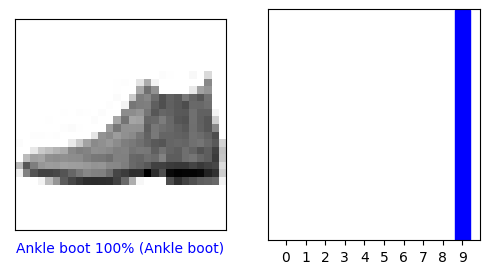

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

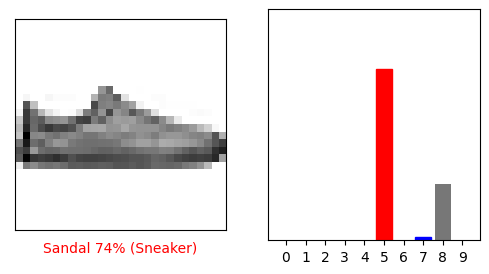

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

* 올바르게 예측된 레이블은 파랑
* 잘못 예측된 레이블은 빨강
* 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점), 신뢰도 점수가 높을 때도 잘못 예측 가능

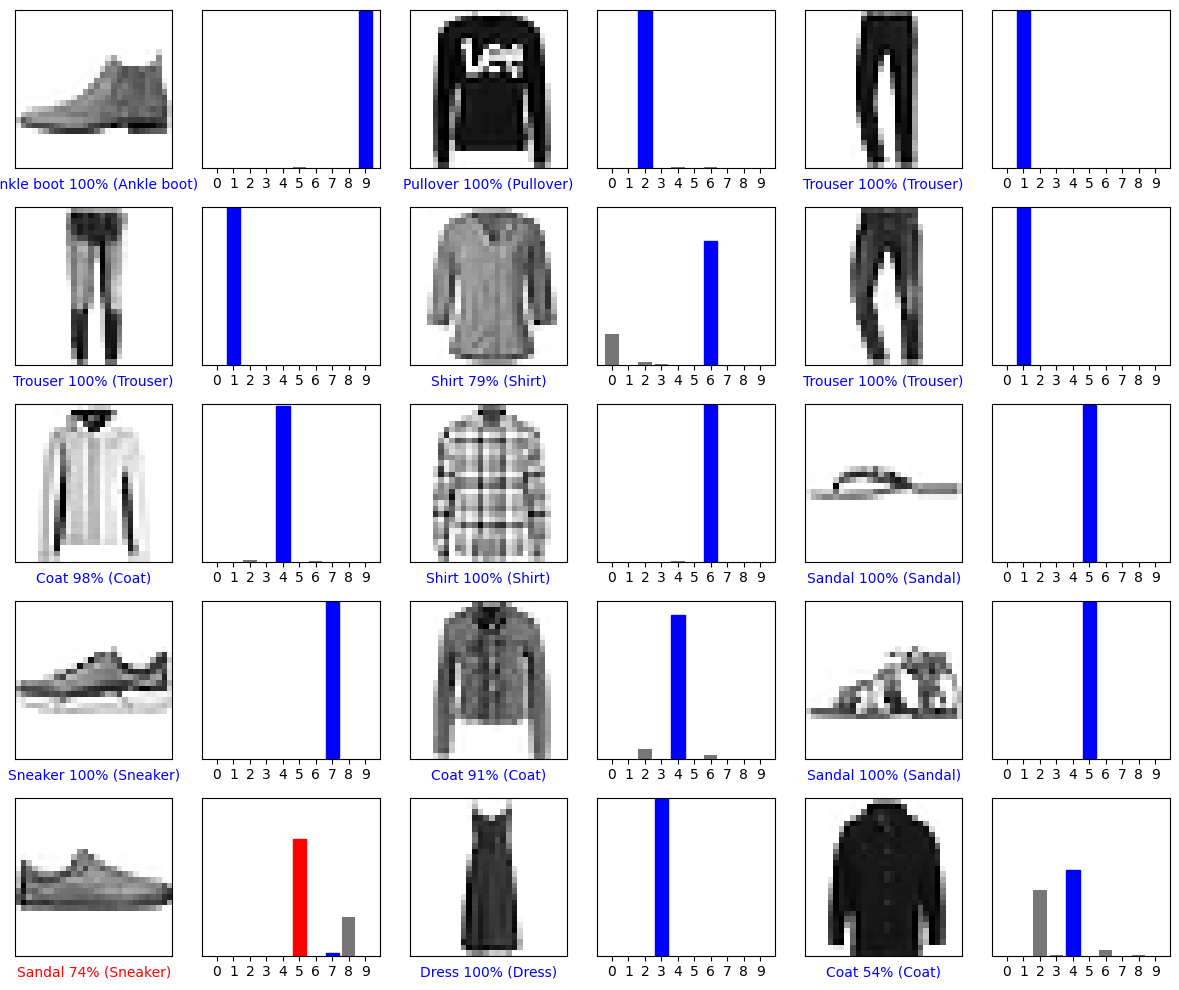

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측 생성

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화
* 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야함

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


[[6.3088351e-05 3.1958980e-14 9.9812347e-01 5.5860600e-08 6.3619681e-04
  1.3225877e-13 1.1772612e-03 5.1641409e-20 1.3054725e-09 1.4102463e-14]]


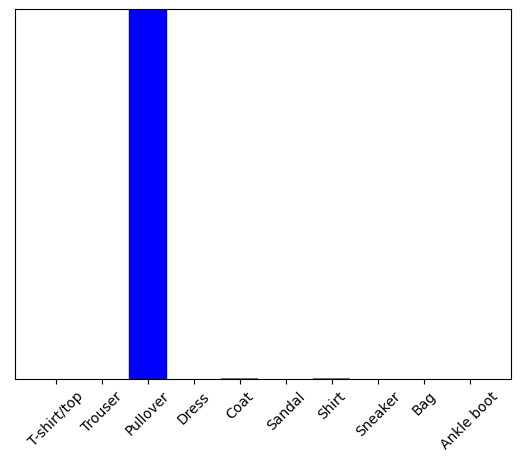

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록 반환
* 배치에서 (유일한) 이미지에 대한 예측을 가져옴

In [ ]:
np.argmax(predictions_single[0])

2